In [26]:
from __future__ import print_function
import findspark
findspark.init()
from pyspark.sql import SparkSession, SQLContext, Row
import seaborn as sns

+---------+--------------+-----+------+
|signal_id|id_measurement|phase|target|
+---------+--------------+-----+------+
|        0|             0|    0|     0|
|        1|             0|    1|     0|
|        2|             0|    2|     0|
|        3|             1|    0|     1|
|        4|             1|    1|     1|
|        5|             1|    2|     1|
|        6|             2|    0|     0|
|        7|             2|    1|     0|
|        8|             2|    2|     0|
|        9|             3|    0|     0|
|       10|             3|    1|     0|
|       11|             3|    2|     0|
|       12|             4|    0|     0|
|       13|             4|    1|     0|
|       14|             4|    2|     0|
|       15|             5|    0|     0|
|       16|             5|    1|     0|
|       17|             5|    2|     0|
|       18|             6|    0|     0|
|       19|             6|    1|     0|
+---------+--------------+-----+------+
only showing top 20 rows

8187 525
2726 

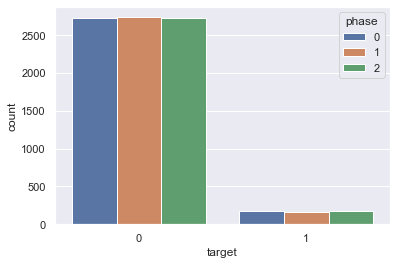

In [40]:
if __name__ == "__main__":

    # Create a SparkSession (Note, the config section is only for Windows!)
    spark = SparkSession.builder.master('local[*]').config("spark.driver.memory", "10g").config("spark.cores.max", "6").appName("FaultDetection").getOrCreate()
    #spark = SparkSession.builder.appName("RecommenderSystem").getOrCreate()
    
    # Load up data as dataframe
    data = spark.read.option("header", "true").option("inferSchema", "true").csv("C:/My_Data/MS/CS657/Project/InputData/metadata_train.csv")
    data.show(20)
    
    #signalData = spark.read.option("header", "true").option("inferSchema", "true").parquet("C:/My_Data/MS/CS657/Project/InputData/train.parquet")
    #signalData = signalData.limit(500)
    #signalData.show(20)
    
    ################################# Visualization of train data ###################################################
    
    notFaulty = data.select('signal_id').where(data.target == 0).count()
    faulty = data.select('signal_id').where(data.target == 1).count()
    
    # 8187 -  signals are not faulty, while 525 are faulty
    print(notFaulty, faulty)
    
    # phase wise distribution of faulty vs not faulty signals
    notFaultyPhase0 = data.select('signal_id').where((data.target == 0) & (data.phase == 0)).count()
    faultyPhase0 = data.select('signal_id').where((data.target == 1) & (data.phase == 0)).count()
    print(notFaultyPhase0, faultyPhase0)
    
    notFaultyPhase1 = data.select('signal_id').where((data.target == 0) & (data.phase == 1)).count()
    faultyPhase1 = data.select('signal_id').where((data.target == 1) & (data.phase == 1)).count()
    print(notFaultyPhase1, faultyPhase1)
    
    notFaultyPhase2 = data.select('signal_id').where((data.target == 0) & (data.phase == 2)).count()
    faultyPhase2 = data.select('signal_id').where((data.target == 1) & (data.phase == 2)).count()
    print(notFaultyPhase2, faultyPhase2)
    
    
    meta_data =  data.toPandas()
    sns.set(style="darkgrid")
    sns.countplot(x = 'target',hue = 'phase',data = meta_data)
    
    #################################################################################################################
    
    
    ################################# Feature Extraction ############################################################
    
    
    
    
    
    #################################################################################################################
    
    
    spark.stop()